### Gradient Descent

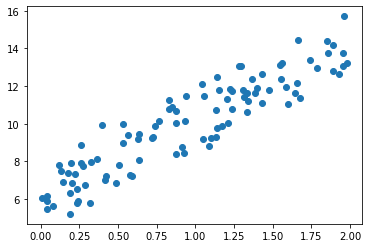

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#  y = 4X + 6 식을 만듬 with noise
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 6 + 4 *X+ np.random.randn(100,1)

plt.scatter(X,y)

In [4]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X,w1.T) + w0
    diff = y-y_pred
    
    w0_factors = np.ones((N,1))
    
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T,diff))
    w1_update = -(2/N) * learning_rate * (np.dot(X.T,diff))
    
    return w1_update, w0_update

In [5]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

In [6]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [7]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [9]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [10]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))
  

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

In [15]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['target'] = boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [16]:
boston_df.shape

(506, 14)

In [19]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

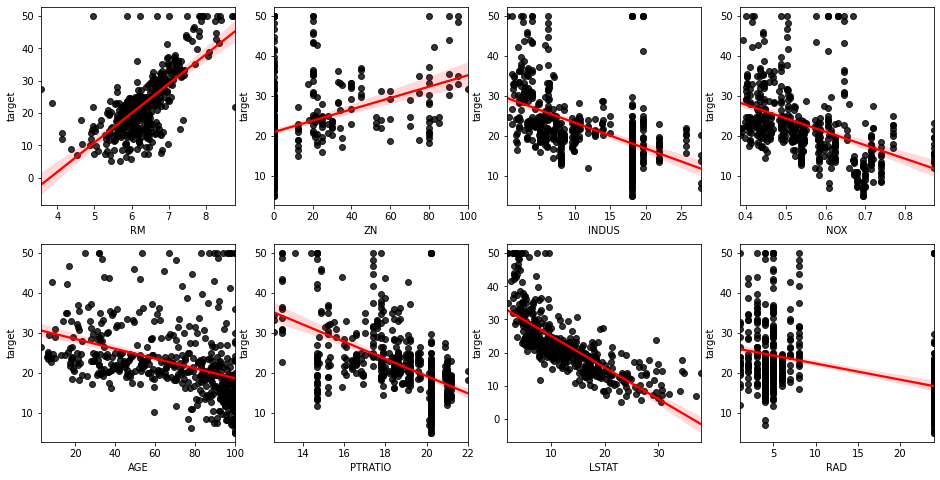

In [24]:
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='target', data=boston_df, ax=axs[row][col],
               scatter_kws={"color": "black"}, line_kws={"color": "red"})

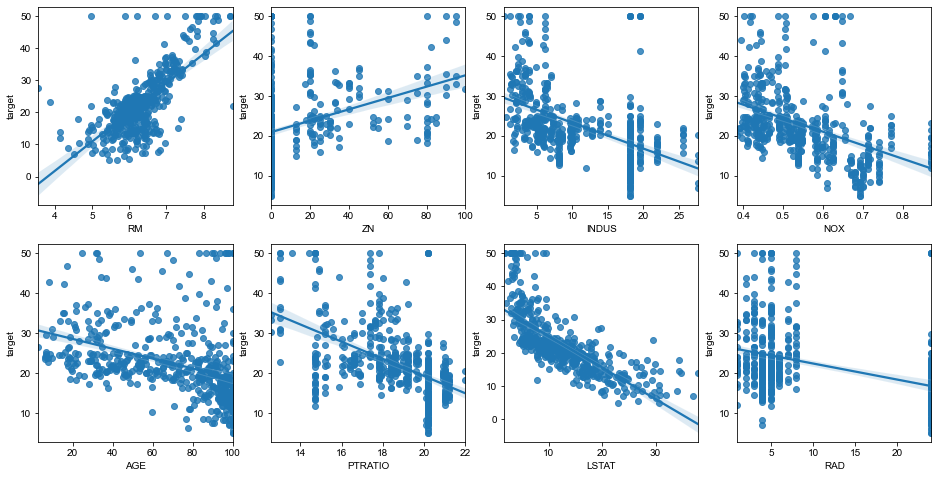

In [27]:
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='target', data=boston_df, ax=axs[row][col])
    sns.set_style('whitegrid')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['target']
X_data = boston_df.drop(['target'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                   test_size=0.2)
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.4f}, RMSE : {1:.4f}'.format(mse,rmse))
print('Variance score : {0:.4f}'.format(r2_score(y_test,y_pred)))

MSE : 28.3231, RMSE : 5.3219
Variance score : 0.6161


In [42]:
print('회귀 계수값:',np.round(lr_clf.coef_,3))
print(lr_clf.coef_.shape)

회귀 계수값: [-1.0500e-01  4.4000e-02  1.8000e-02  2.6000e+00 -1.7193e+01  4.4120e+00
 -1.0000e-03 -1.4790e+00  2.6100e-01 -1.1000e-02 -9.1300e-01  1.0000e-02
 -4.9800e-01]
(13,)


In [45]:
coeff = pd.Series(data=np.round(lr_clf.coef_,2),index = X_data.columns)
coeff.sort_values(ascending=False)

RM          4.41
CHAS        2.60
RAD         0.26
ZN          0.04
INDUS       0.02
B           0.01
AGE        -0.00
TAX        -0.01
CRIM       -0.11
LSTAT      -0.50
PTRATIO    -0.91
DIS        -1.48
NOX       -17.19
dtype: float64

In [47]:
# Cross Val Score에서 neg_mean_squared_error는 음수이다.
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

neg_mse_score = cross_val_score(lr, X_train, y_train,
                                scoring = 'neg_mean_squared_error',cv=5)
rmse_score = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse_score)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_score, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_score, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-21.76 -20.59 -15.95 -27.36 -27.37]
 5 folds 의 개별 RMSE scores :  [4.66 4.54 3.99 5.23 5.23]
 5 folds 의 평균 RMSE : 4.732 
